# Clustering utilizando Mean-Shift sobre Iris

### 1. Realizamos las importaciones necesarias

In [10]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import datasets
from sklearn import metrics

### 2. Cargamos el dataset de Iris. Dividimos el conjunto de datos en sépalos y petalos

In [2]:
iris = datasets.load_iris()
sepal_data = iris.data[:,:2]
petal_data = iris.data[:,2:4]

### 3. Creamos dos objetos MeanShifty, uno para sépalos y otro para petalos, y ajustamos los datos

In [3]:

ms1 = MeanShift(n_jobs = -1).fit(sepal_data)
# determinar los centroides y las etiquetas  para los sépalos
centroids_sepals = ms1.cluster_centers_
labels_sepals = ms1.labels_

ms2 = MeanShift(n_jobs = -1).fit(petal_data)
# determinar los centroides y las etiquetas  para los petalos
centroids_petals = ms2.cluster_centers_
labels_petals = ms2.labels_

### 4. Definimos un estilo para los gráficos

In [4]:
style.use('ggplot')

### 5. Se crean diagramas de dispersión para representar los clústeres

#### a. Gráfico de dispersión (datos y centroides) para los sépalos en 2D

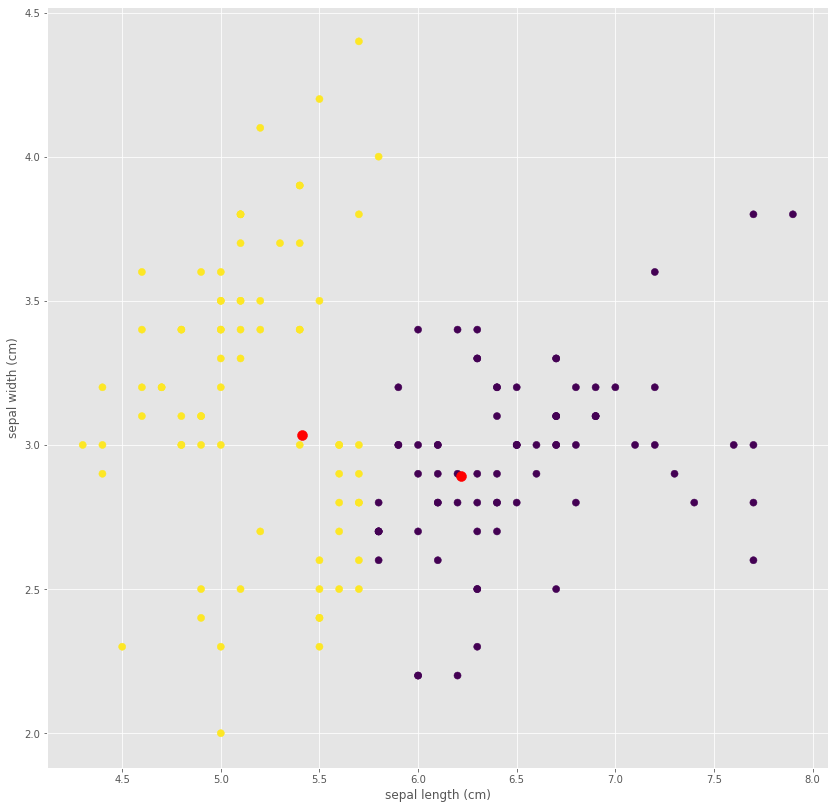

In [5]:
fig = plt.figure(figsize = (14,14))
ax1 = fig.add_subplot()
ax1.scatter(sepal_data[:,0], sepal_data[:,1], c=labels_sepals, s=50)
ax1.scatter(centroids_sepals[:,0], centroids_sepals[:,1], c="red", s=100)
ax1.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
plt.show()

#### b. Gráfico de dispersión (datos y centroides) para los sépalos en 3D

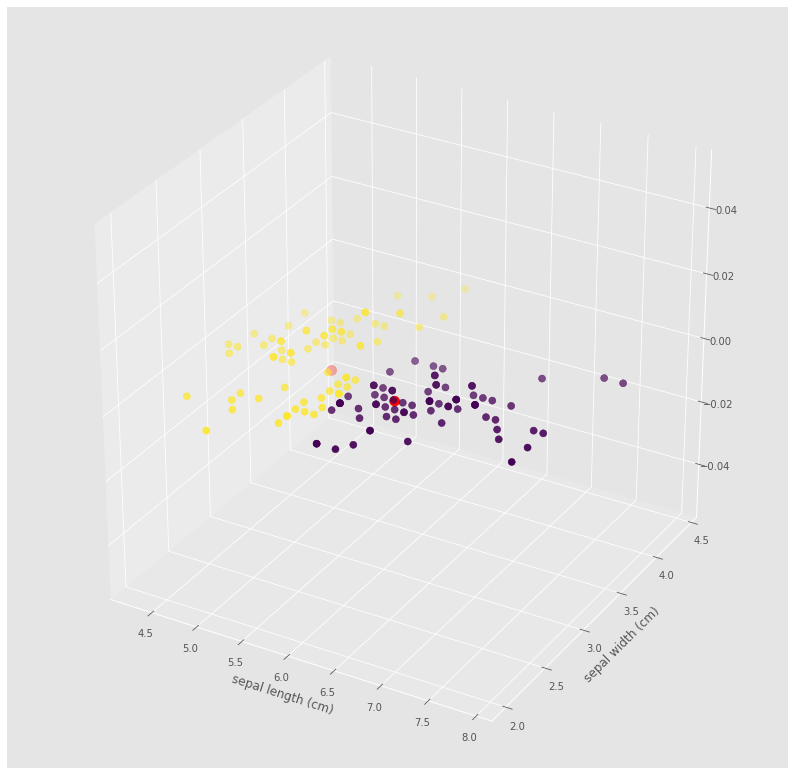

In [6]:
fig = plt.figure(figsize=(14,14))
ax2 = fig.add_subplot(projection="3d")
ax2.scatter(sepal_data[:,0], sepal_data[:,1], c=labels_sepals, s=50)
ax2.scatter(centroids_sepals[:,0], centroids_sepals[:,1], c="red", s=100)
ax2.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
plt.show()

#### c. Gráfico de dispersión (datos y centroides) para los petalos en 2D

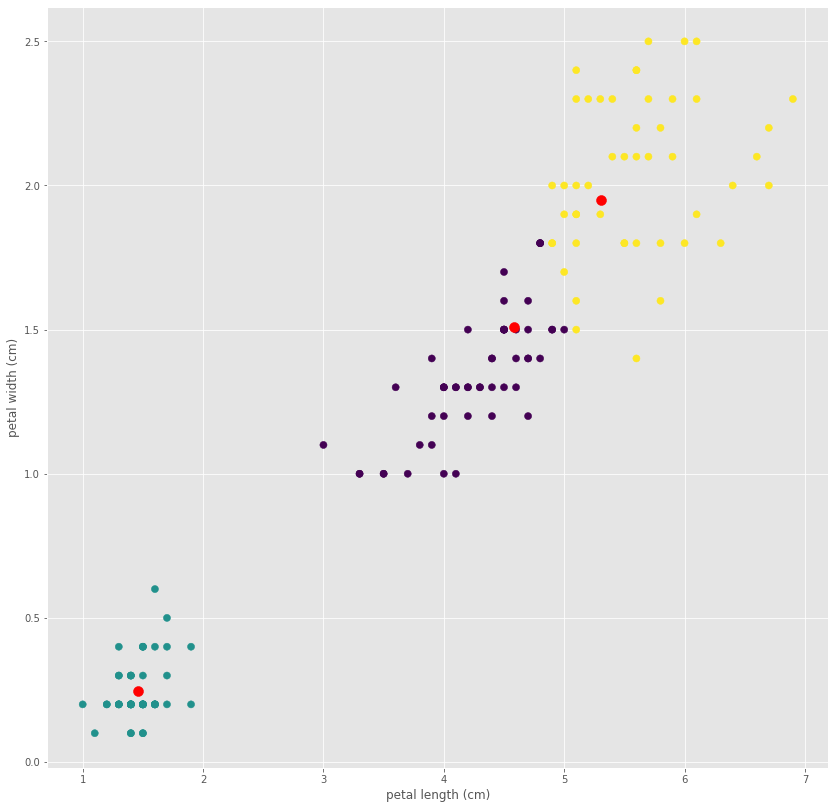

In [7]:
fig = plt.figure(figsize=(14,14))
ax3 = fig.add_subplot()
ax3.scatter(petal_data[:,0], petal_data[:,1], c=labels_petals, s=50)
ax3.scatter(centroids_petals[:,0], centroids_petals[:,1], c="red", s=100)
ax3.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
plt.show()

#### d. Gráfico de dispersión (datos y centroides) para los petalos en 3D

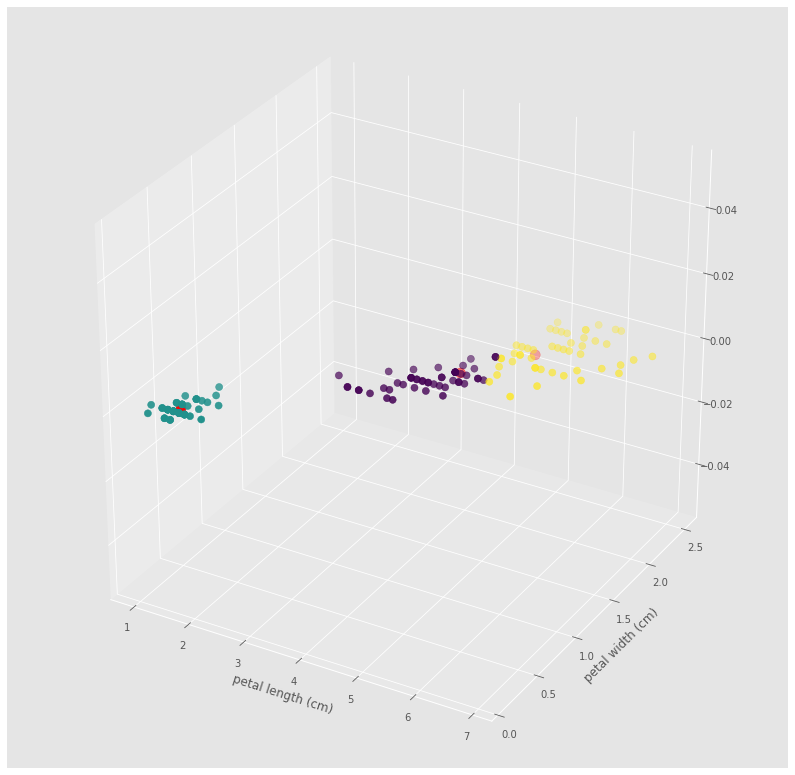

In [8]:
fig = plt.figure(figsize=(14,14))
ax4 = fig.add_subplot(projection="3d")
ax4.scatter(petal_data[:,0], petal_data[:,1], c=labels_petals, s=50)
ax4.scatter(centroids_petals[:,0], centroids_petals[:,1], c="red", s=100)
ax4.set(xlabel=iris.feature_names[2], ylabel=iris.feature_names[3])
plt.show()

### 6. Calculamos Índice de Rand ajustado al azar tambien llamado Rand index adjusted for chance

El índice Rand calcula una medida de similitud entre dos agrupamientos considerando todos los pares de muestras y contando los pares que se asignan en el mismo grupo o en grupos diferentes en los agrupamientos predichos y verdaderos.

In [30]:
labels_true = iris.target
print("Índice de Rand ajustado al azar es: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels_sepals))

Índice de Rand ajustado al azar es: 0.394


Se garantiza que el índice Rand ajustado tiene un valor cercano a 0.0 para el etiquetado aleatorio independientemente del número de conglomerados y muestras; y exactamente 1.0 cuando los conglomerados son idénticos (hasta una permutación).

En este caso se tiene un valor cercano a 0.0 por lo tanto los conglomerados no son identicos, sino que son mas bien disímiles.  